# Titanic Survival Prediction
## Scientific Python - Final Project -SS23
### By Lucia Walther and Milena Schlichting

On April the 15th 1912 the infamous sinking of the RMS Titanic caused the tragic death of more than 1500 people, making it the the deadliest sinking of a single ship in that time. Until today the fate of the "unsinkable" ship stays prominent in our minds, leading to improvement of maritime safety and social (class) critizism. The latter is of interest for us, since we want to investigate how social status, gender, age and other factors influenced the survival chance of the crew and passengers aboard. 

In this project you will get an informed prediction about your survival during the sinking of the Titanic, based on your personalized input. 

For the prediction we will use two supervised learning algorithms: first a decision tree and second the k-nearest-neighbor (knn) classification algorithm. In both, we will use the most relevant information from the dataset to make a choice on the survival based on a user input. After receiving the output from both algorithms, we can then compare how accurate they are.

We base our models on the titanic dataset from Kaggle.com (https://www.kaggle.com/c/titanic), where it is already distinguished in train and test set. This is why we downloaded the set from github (https://gist.github.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380) as there is the whole dataset that we can use to preprocess everything and then work with the data the way we need it. 


### DISCLAIMER!
At no point in this project do we want to make fun of or downplay this tragedy and its victims. We simply used this dataset and the predictive model as an exercise for our final project in scientific python, because we were interested in it. Also we are aware that one cannot really predict a survival rate simply based on this data as there are many other factors that play into such a tragedy and whether you survive or not. 

Throughout the project we can only ask for the sex in male or female and not specify the gender or anything else, since the dataset is based on the year 1912. We do not mean to discriminate against anyone. We hope you enjoy!


### Looking at the raw data
First we will import necessary libraries, load the data set and have a look at it to see what we are working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("titanic.csv")

KeyboardInterrupt: 

In [573]:
# First let's take a look at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see there are 12 features including 
- PassengerId: numerating the passengers with integers ranging from 1 to 891
- Survived: either 1 (survived) or 0 (did not survive)
- Pclass: A proxy for the social-economic status, can be either 1st (upper) class, 2nd (middle) class or 3rd (lower) class
- Name: the name of the passenger/ crew member
- Sex: either female or male
- Age: if the age is less than 1 it is given as a fraction and if estimated it is given in the form xx.5
- SibSp: indicates with how many sibling or spouses the person traveled
- Parch: Indicates how many family members (including parents and children) traveled with the person. Some children traveled with just a nanny and therefore have the value 0.
- Ticket: the ticket number
- Fare: passenger fare
- Cabin: the cabin number
- Embarked: port of embarkation, either C = Cherbourg,  Q = Queenstown or S = Southampton

Our target class is "Survived". 

## Normalizing
In order to work with the data we are going to normalize it and format certain features to make them easier to work with. 

There are some missing values that we convert into numpy 'NaN' values.

In [574]:
df = df.replace('nan', np.nan)

We will start with the feature "Sex" and turn the possible values "Male" and "Female" into numerical values, with 1 = Female and 0 = Male.

In [575]:
df['Sex'] = df['Sex'].replace('male', 0)
df['Sex'] = df['Sex'].replace('female', 1)

Next we have a look at the unique values of the "Cabin" feature. On the titanica encyclopedia website (https://www.encyclopedia-titanica.org/cabins.html) we can see that the Letters A-G and T indicate the deck the cabin was on. This is interesting, as the deck directly corresponds with the class of the passenger. The room number on the other hand is not of further interest. <br>
Therefore we simplify the "Cabin" feature into "Deck", which indicates the deck number (A-G, T) of the Cabin. We further simplify by taking the first letter as the deck. Values like *"B57 B59 B63 B66"* and *"F G63"* are therefore reduced to their first listed cabin floor.

![Titanic Cutout](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Olympic_%26_Titanic_cutaway_diagram.png/220px-Olympic_%26_Titanic_cutaway_diagram.png "Titanic Cutout")

In [577]:
#prints all unique values before simplification
print(df["Cabin"].unique()) 

#replace the values with its first character or 'nan'
df["Deck"] = df["Cabin"].str[0] 

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


To be able to do calculations with these values we turn the letters A-G into the numbers 0-6 and T = 7. 

In [578]:
replacement_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
df['Deck'] = df['Deck'].replace(replacement_dict)

When normalizing the Embarked column (where the passengers got on the ship) we replace the strings with numbers in the order in which the ship sailed the towns: <br>
- S (*Southhampton*) will be __0__
- C (*Cherbourg*) will be __1__
- Q (*Queenstown*) will be __2__.


In [579]:
df["Embarked"] = df["Embarked"].replace("S", 0)
df["Embarked"] = df["Embarked"].replace("C", 1)
df["Embarked"] = df["Embarked"].replace("Q", 2)

![Titanic Route](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/TitanicRoute.svg/1200px-TitanicRoute.svg.png "Titanic Route")


### Data set after normalizing:

In [580]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,NaN


## Finding correlation in the data

Now we can work with the data and investigate the relationships between the different features. To get an overview of the correlations we plot a heatmap. We leave out the features *"Name", "Ticket"* and *"Cabin"*, because they are non-numeric and don't provide further information. Instead of *"Cabin"* we use the normalized feature *"Deck"*.

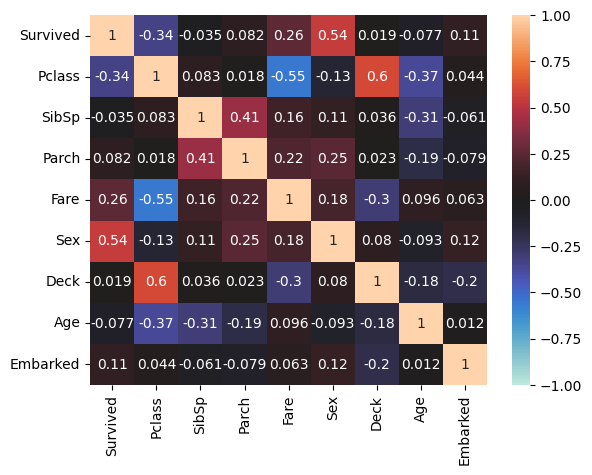

In [581]:
sub = df[["Survived", "Pclass", "SibSp", "Parch", "Fare", "Sex", "Deck", "Age", "Embarked"]]
sns.heatmap(sub.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()


The heat map shows us the correlation of the different features. We are mostly interested in the features that have a high correlation with our target class *"Survived"*. These are *Pclass* with *-0.34*, *"Fare"* with *0.26* and *"Sex"* with the highest correlation of *0.54*. We can ignore if a value is positive or  negative and are only interested in the absolute value. Positive or negative correlation is defined by the values we chose for the features and does not give us extra information. 

Further investigation of these correlations follows.

__Passenger class and Fare__ <br>
*Pclass* and *Fare* show a high correlation of *-0.55*, since passengers in a higher class also payed more for their ticket. We can also see that *Deck* has a high correlation of *0.6* with *Pclass*. This can be explained with the class order of the ship, having the best rooms at the top decks and the cheapest cabins at the bottom. <br>
An explanation for the correlation of *Survival* and *Pclass* is, that passengers with a higher social status were given higher preference. This is evidence for classism and privilege, which resulted in the before mentioned debates about social (class) critizism.



### Sex
To analyze the relevant data better, we want to show off the importance of each value in the important columns. We start off with the gender of the passangers. For that we replace the values we used earlier to learn more about the correlation and switch the 0 back to "male" and 1 back to "female" so the graphs are more easily understood. 

In [582]:
df['Sex'] = df['Sex'].replace(0,'male')
df['Sex'] = df['Sex'].replace(1,'female')

In [584]:
genderCounts = df["Sex"].value_counts()
print("Total passenger count:")
print(genderCounts)

Total passenger count:
Sex
male      577
female    314
Name: count, dtype: int64


In [585]:
survivedGenderCounts = df[df["Survived"] == 1]["Sex"].value_counts()
print("Passengers that survived:")
print(survivedGenderCounts)

Passengers that survived:
Sex
female    233
male      109
Name: count, dtype: int64


In [588]:
print("Survival rate for each sex in percent:")
print("Men: ", round(((survivedGenderCounts["male"] / genderCounts["male"]) * 100), 2), "%")
print("Women: ", round(((survivedGenderCounts["female"] / genderCounts["female"]) * 100), 2), "%")


Survival rate for each sex in percent:
Men:  18.89 %
Women:  74.2 %


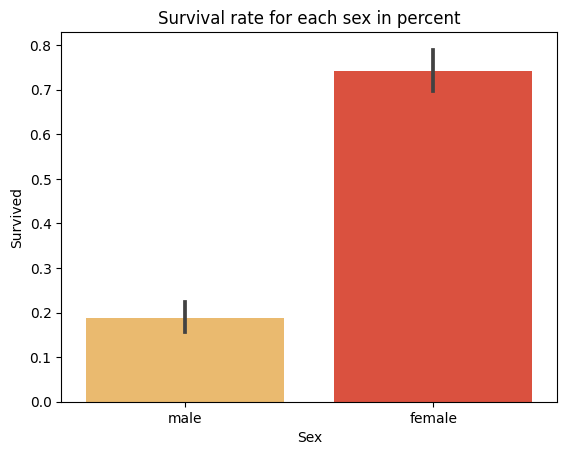

In [589]:
ax = sns.barplot(x="Sex", y="Survived", data=df, palette="YlOrRd").set(title="Survival rate for each sex in percent")
plt.show()

*Sex* is the feature with the highest correlation to *Survival*. As we can see that is due to the high percentage of surviving women (~74%) and the low percentage of surviving men (~19%). <br>
Contextually this makes sense, since women and children got prefered access to the life boats. This is due to the code of conduct "Women and children first", also called the  *Birkenhead drill*.

### Pclass

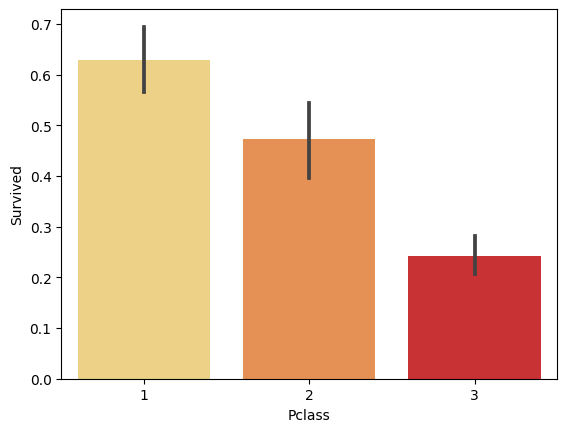

In [528]:
sns.barplot(x="Pclass", y="Survived", data=df,palette="YlOrRd")
plt.show()

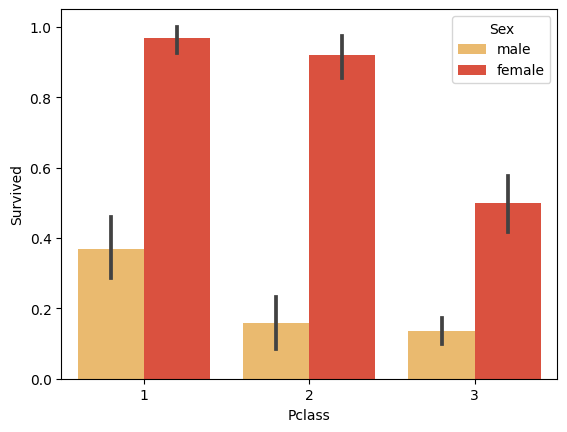

In [529]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, palette="YlOrRd")
plt.show()

When looking at the passenger class (so 1, 2 or 3), we can also see a strong correlation between who survived and which class they were a part of. In the first class around 62% survived, in the second it was around 48% and in the third only 25%. In all classes though, more women lived than the men did, however, almost twice as many men survived in the first class compared to the other two. 

### Age
We were surprised to see in the heatmap, that *Age* had almost no correlation with *Survival*. We assumed that a higher percentage of children survived for the same reason that more women survived. The following plot shows that we assumed right; 50% of all children (age 0-18) survived, while less than 40% of the adults (age 18-67) and only about 15% of the seniors (age 80+) survived. <br>
Even though we can see a clear correlation, this might not have shown in the heatmap since only 139 children were on board, so the statistical impact was not as great.

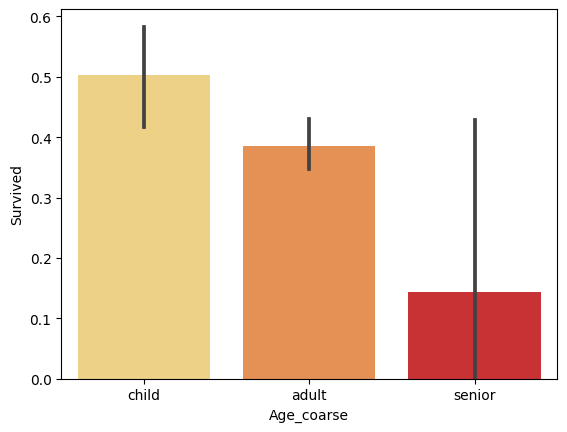

In [590]:
# sort all passengers into coarse age groups (categorize the data)
df['Age_coarse'] = pd.cut(df['Age'], bins=[0, 18,67, 80], labels=['child', 'adult', 'senior'])  

sns.barplot(x="Age_coarse", y="Survived", data=df, palette="YlOrRd") 
plt.show()

In [591]:
df.groupby("Age_coarse").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
Age_coarse,,,,,,,,,,,,,
child,139,139,139,139,139,139,139,139,139,139,23,139,23
adult,568,568,568,568,568,568,568,568,568,568,159,566,159
senior,7,7,7,7,7,7,7,7,7,7,3,7,3


# Decision Tree
After investigating the different features we found *"Pclass", "Sex"* and *"Age"* to be significant for classifying our target class *"Survived"*. Therfore we are going to train a decision tree with a subset of our data, including these features. For the decision tree we are using the DecisionTreeClassifier from the Sklearn library.

In [592]:
#change the string values back to integers for easier calculations
df['Sex'] = df['Sex'].replace('male',0)
df['Sex'] = df['Sex'].replace('female',1)

First we select only the important features and devide into data and target values. We also drop any NaN values. To work with the Age groups we replace each group with integers: a *child* is now 0, an *adult* is 1, and a *senior* is 2.

In [593]:
df["Age_coarse"] = df["Age_coarse"].replace("child", 0)
df["Age_coarse"] = df["Age_coarse"].replace("adult", 1)
df["Age_coarse"] = df["Age_coarse"].replace("senior", 2)

In [594]:
tree_df = df[["Pclass", "Sex", "Age_coarse","Survived"]].dropna()    # only important features for our decision tree and drop Nan
data = tree_df[[ "Pclass", "Sex", "Age_coarse"]]        # data needed of tree classifier
target = tree_df["Survived"]        # one target -> Survived or not

In [595]:
#create the Decision tree
tree = DecisionTreeClassifier()

# split the data into training and test set with a random initializer state at 30
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.2, random_state = 30)

#fit the training set to the decision tree
tree.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [596]:
ypred_tree = tree.predict(Xtest)
acc_tree = round(accuracy_score(ytest, ypred_tree), 4)
print("Accuracy:", acc_tree)

# Evaluation of classifier with appropriate metrics
target_names = ["not survived", "survived"]  # create target names for better understanding in report
print(classification_report(ytest, ypred_tree, target_names = target_names))

Accuracy: 0.8042
              precision    recall  f1-score   support

not survived       0.79      0.93      0.85        87
    survived       0.85      0.61      0.71        56

    accuracy                           0.80       143
   macro avg       0.82      0.77      0.78       143
weighted avg       0.81      0.80      0.80       143



Now we test our prediction of the decision tree and evaluate the accuracy score. The decision tree achieves a relativly good accuracy of 0.804. This means that the model made correct predictions 80% of the time.

__Precision__

Precision is how many positive predictions were actually correct. In our case we get a precision of 0.79 for the case of not survived and a precision of 0.85 for survived. The survived positive seems pretty accurate for the decision tree. 

__Recall__

The recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. For the not survived category in our decision tree it is really high with 0.93. However the recall for the survived is only at around 0.61 - the lowest score across the report.

__F1-score__

This score combines both the recall and precision and is generally described as the harmonic mean between them. It is used to provide a single metric that weights the two ratios in a balanced way. For the not survived category, our F1-score is 0.85, but for the survived one only 0.71. This is because the recall for the survived class is pretty low and therefore has a higher impact due to the senistivity of the f1-score.

Now we visualize the tree based on our training data. 


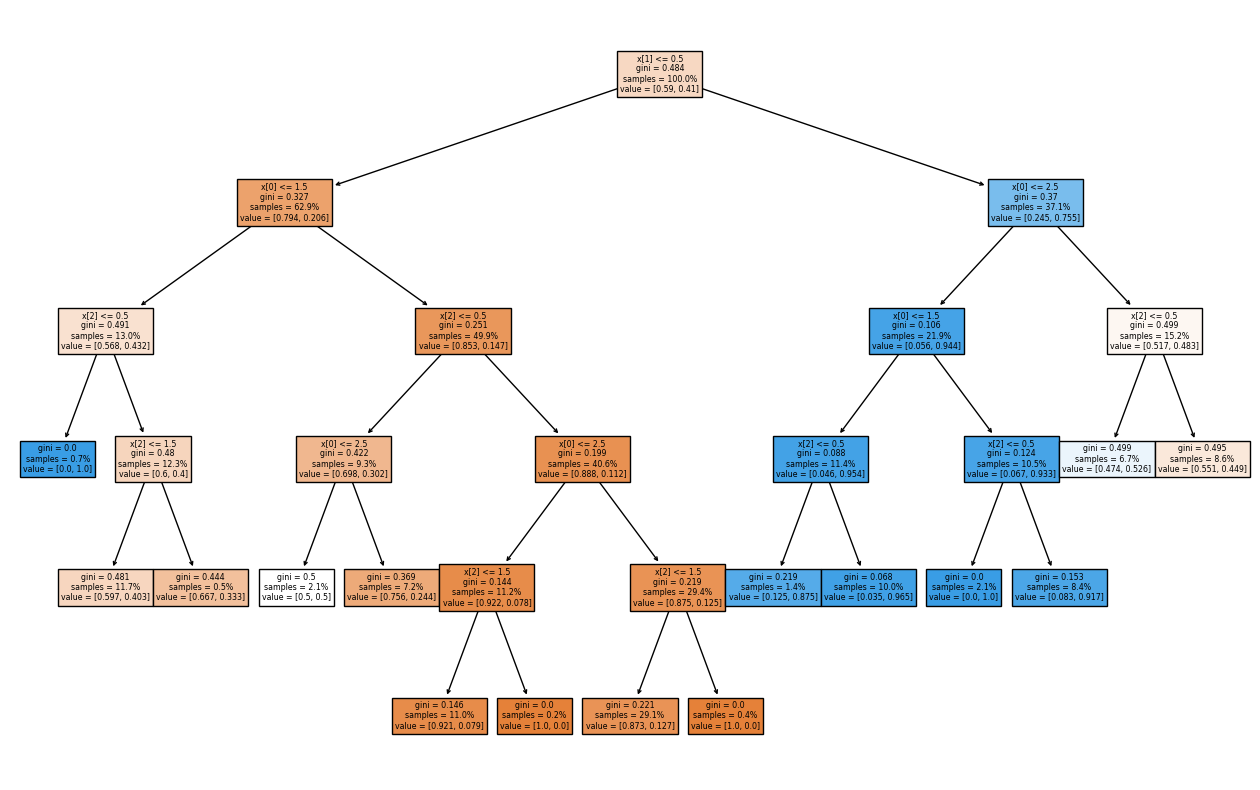

In [597]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(tree, filled=True, proportion=True)

plt.show()

__Attributes__ <br>
Each node shows 4 attributes: <br>
 1. The first attribute shows which decision is going to be made at this node. The indexed x denotes the feature (x[0] = Pclass, x[1] = Sex, x[2] = Age_coarse). For example, the root node expresses, that if the sex of the input is 0 (= male) continue on the left side, otherwise on the right.
 2. The *gini* score suggests how good a split is. The node with the highest *gini* score is at the top.
 3. *Samples* is the percentage of of the input data that reached the node. The sum off all leaf-node-samples is 100%, since all inputs have an output.
 4. The *value* attribute has two numbers, the first one shows with how much certainty the output is 0 (= not survived), the second one with how much certainty the output is 1 (= survived). Together they sum up to 1.

__Colors__ <br>
Less __vibrant__ colors indicate, that the certainty of the prediction is lower. Meaning that the *value* feature is close to *0.5* for *survived* and *not-survived*. <br>
The tree is __colored__ in either orange or blue. Fields with a higher survival chance (> 50%) are colored in blue. Orange indicated less chance of survival and white is the exact middle (= 50%). 

The tree is structured in a way that the top node (or higher nodes) represents a higher weighting in the decision (more impact on the survival prediction). This is calculated with the *gini* score. The root asks about your sex first and females have a higher survival rate than men. Then the class of the passenger is from importance ( so if you're 1st, 2nd or 3rd class). Finally it asks your age group (child, or adult, or senior) and as a child you have a higher chance of survival than the others.

# K-Nearest-Neighbors Classifier

Now we train a K-nearest-neighbors classifier on the same data set. We noticed that the accuracy score is highly dependend on *n*, the number of neighbors. Therefore we are further investigating the optimal choice for *n*.

In [599]:
knn = KNeighborsClassifier(n_neighbors=3).fit(Xtrain,ytrain)

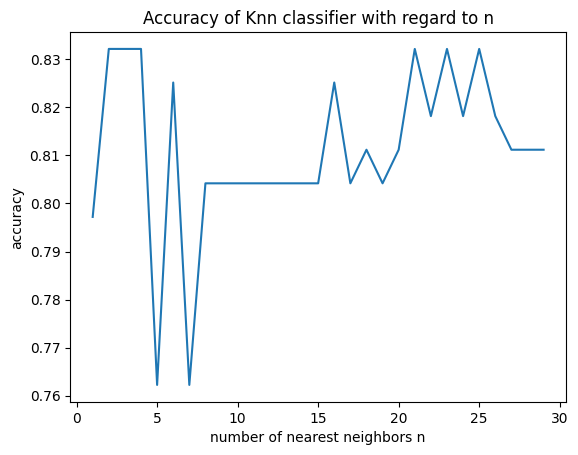

In [600]:
#investigate choice for n based on accuracy
accuracy = []
n = list(range(1, 30))
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i).fit(Xtrain,ytrain)

    ypred_knn = knn.predict(Xtest)
    accuracy.append(accuracy_score(ytest, ypred_knn))
#print(accuracy)
plt.plot(n,accuracy)
plt.xlabel("number of nearest neighbors n")
plt.ylabel("accuracy")
plt.title("Accuracy of Knn classifier with regard to n")
plt.show()
    

In [598]:
# Evaluate classifier with accuracy and report
ypred_knn = knn.predict(Xtest)
acc_knn = round(accuracy_score(ytest, ypred_knn), 4)
print("Accuracy:", acc_knn)
print(classification_report(ytest, ypred_knn, target_names = target_names))

Accuracy: 0.8322
              precision    recall  f1-score   support

not survived       0.80      0.97      0.88        87
    survived       0.92      0.62      0.74        56

    accuracy                           0.83       143
   macro avg       0.86      0.80      0.81       143
weighted avg       0.85      0.83      0.82       143



__Evaluation__

For the knn algorithm the not survived recall is the highest with 0.97. This means that the classifier correctly predictied 97% of the positives out of all positives available. In comparison with the survived group, the recall is here only at 0.62 (which is the lowest in this case). But, the precision in both cases seems pretty good, with not survived as 0.8 precision and survived even with 0.92. The harmonic mean shows that the prediction for the not survived category is overall better (0.88) than for the survived one (0.74). 
To evaluate how good our knn classifier works as a predictive model, we can look at the accuracy score of the report. With 0.832 (so 83%) it is a pretty good estimate on the prediction. 

## Comparing decision tree and k-nearest-neighbor classifier

In [601]:
# comparison tree and knn
print("The accuracy of knn = ", acc_knn)
print("The accuracy of the decision tree = ", acc_tree)
if acc_knn < acc_tree:
    print("Therefore, the accuracy of the tree is better than that of the knn algorithm:", acc_knn, "<", acc_tree, ".")
elif acc_knn > acc_tree:
    print("Therefore, the accuracy of the knn is better than that of the decision tree:", acc_knn, ">", acc_tree, ".")
else:
    print("Both accuracies are the same.")

The accuracy of knn =  0.8322
The accuracy of the decision tree =  0.8042
Therefore, the accuracy of the knn is better than that of the decision tree: 0.8322 > 0.8042 .


Overall the report of the knn algorithm seems to be better in every aspect of precision, recall, f1-score and accuracy than that of the decision tree. Especially the precision for the survived category shows the biggest difference: in knn it is 0.92, but in the decision tree it is only 0.85. So the overall predictions (Postives) of survived consist of 92% true positives for the knn algorithm and 85% for the tree. That is a gap of 7% false positives that needs to be accounted for. The other values are more similar and sometimes only one precent apart. The accuracy measure is about 3% higher for the knn than for the tree.

# Your turn!

It is April 1912, you decide to set off from Southampton, England to cross the Atlantic Ocean and start a new life in New York City. The voyage on the biggest ship afloat, the RMS Titanic, is planned to last merely seven days. 

It is time to buy your ticket for the passage over the ocean and one week on one of the most luxurious liners in the world. Next please choose a ticket price between 1000€ and 125,000€, enter your age and your sex. Remember, the more you pay for your ticket the better your cabin is, ranging from a shared cabin on the lowest deck to a luxerious suite on the promenade deck.

You are a female adult in class 1 . Here is your ticket, don't lose it and have a wonderful journey!


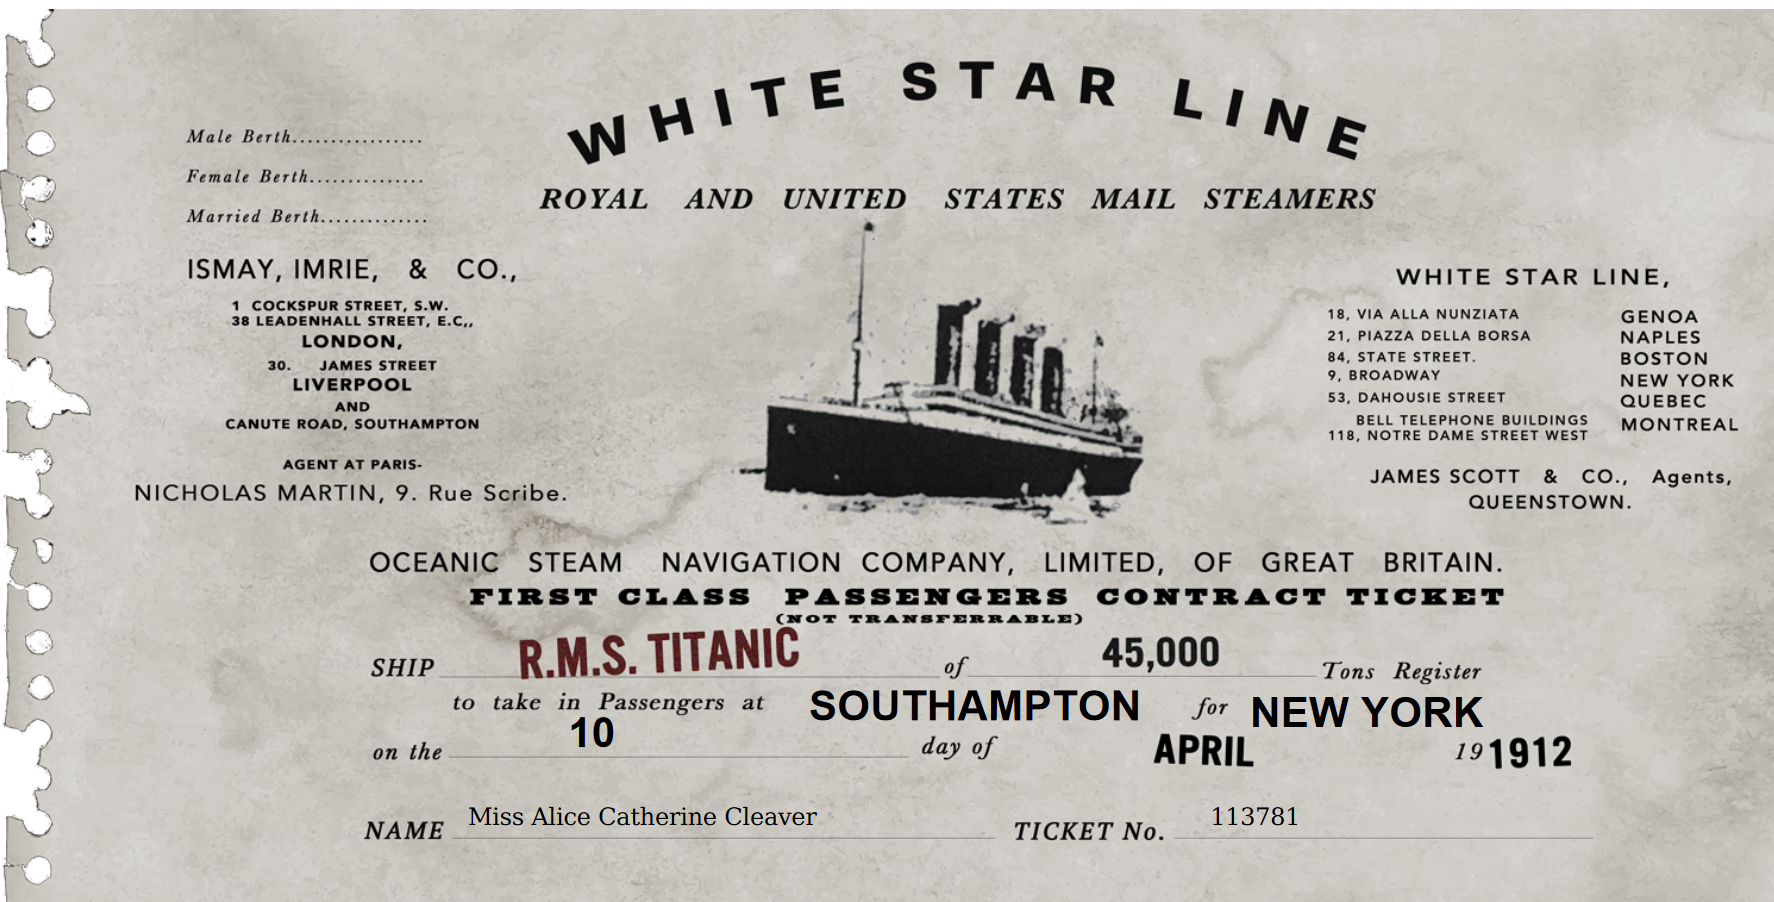

In [602]:
#user input for fare 
user_fare = int(input("Choose a ticket price between 1000€ and 125,000€:"))

#calculate fare input into class
if user_fare >= 1000 and user_fare <  1700:
    user_class = 3
elif user_fare >= 1700 and user_fare <  4200:
    user_class = 2
elif user_fare >= 4200 and user_fare <  125000:
    user_class = 1

## user input for age
user_age = int(input("Enter your age:"))

if user_age <18:
    print_age = "child"   
    user_age = 0
elif user_age > 66:
    print_age = "senior" 
    user_age  = 2
elif user_age >= 18 and user_age <= 66:
    print_age = "adult"
    user_age = 1
    
## user input for sex
user_sex = int(input("What is your sex? Please enter '0' for male or '1' for female:"))
if user_sex == 0:
    print_sex = "male"
elif user_sex == 1:
    print_sex = "female" 


print("You are a", print_sex, print_age, "in class", user_class, ". Here is your ticket, don't lose it and have a wonderful journey!")

if user_class == 1 and user_sex == 0:
    display(Image(filename="first_male.png"))
elif user_class == 1 and user_sex == 1:
    display(Image(filename="first_female.png"))
elif user_class == 2 and user_sex == 0:
    display(Image(filename="second_male.png"))
elif user_class == 2 and user_sex == 1:
    display(Image(filename="second_female.png"))
elif user_class == 3 and user_sex == 0:
    display(Image(filename="third_male.png"))
elif user_class == 3 and user_sex == 1:
    display(Image(filename="third_female.png"))


## April 15th 1912 - 2:10 am 

The starboard side of the RMS Titanic strikes a large iceberg. You and the other 2,224 passengers awake in their cabins. After a while it becomes clear, that the unsinkable ship is going to sink. Chaos breaks loose and everyone storms the 20 available lifeboats. While some can secure themselves a life-saving spot, others are not as lucky. 

Dare to find out if you will survive?

In [603]:
# use user input for prediction
user_X = pd.DataFrame([[ user_class, user_sex, user_age]], columns=["Pclass", "Sex", "Age_coarse"])
prediction_knn = knn.predict_proba(user_X)    #knn prediction with user input
prediction_tree = tree.predict_proba(user_X)    #tree prediction with user input
prediction = (prediction_knn + prediction_tree) / 2     #arithmic mean between both predictions 

if prediction[0][0] > 0.5:
    print("My condolences, you did not survive with a probability of", round(prediction[0][0]*100, 2),"%!")
elif prediction[0][1] >= 0.5:
    print("Lucky, you survived with a probability of", round(prediction[0][1]*100, 2),"%!")

Lucky, you survived with a probability of 96.52 %!


For the final prediction of the users survival we take the mean of the results from the k-nearest-neighbor classifier and the decision tree. This way we can use both algorithms. We could also just take the result from the k-nearest-neighbor classifier, since it performs better than the decison tree. 

This concludes our final project for the course Sientific Python.


### Sources
Ticket images:<br>
https://www.encyclopedia-titanica.org/titanic-tickets/ 

Ticket prices: <br>
For determining the *Pclass* of the user we used the correlation between *Pclass* and *Fare*. We calculated the class acoording to the ticket prices found on *USA Rover* (https://usarover.com/titanic-ticket-price/). The prices were converted from pounds to euros and rounded. Therefore, they only give an estimation of the real prices. 

Historical information: <br>
https://www.encyclopedia-titanica.org/<br>
https://en.wikipedia.org/wiki/Titanic 
